In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
products = pd.read_table("products.tsv")
transactions = pd.read_table("transactions.tsv")
transaction_products = pd.read_table("transactionProducts.tsv")

In [2]:
products = products.rename(columns={'id': 'product_id'})
transactions = transactions.rename(columns={'id': 'transaction_id'})
book = transaction_products.merge(products, how='outer', on='product_id')
book = book.merge(transactions, how='outer', on='transaction_id')

In [3]:
book.head()

,transaction_id,product_id,animal_type,category,subcategory,customer_id,month
0,0,10,CAT,ACCESSORIES,LITTER_BEDDING,0,JANUARY
1,0,5,CAT,FOOD,DRY_FOOD,0,JANUARY
2,0,11,CAT,TOYS,INDOOR_TOYS,0,JANUARY
3,1,10,CAT,ACCESSORIES,LITTER_BEDDING,0,JANUARY
4,1,5,CAT,FOOD,DRY_FOOD,0,JANUARY


Text(0, 0.5, 'Amount of Transactions')

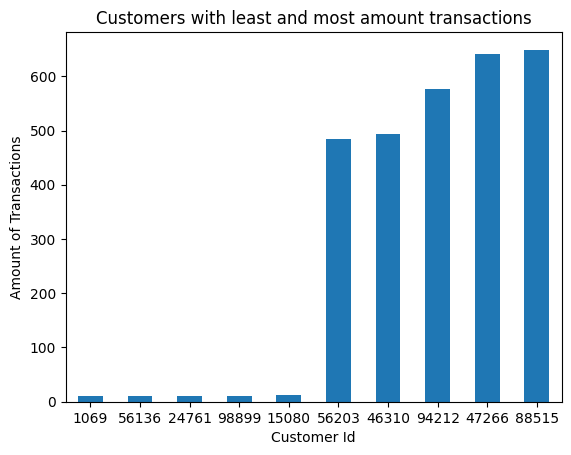

In [9]:
df = book.groupby(["customer_id"]).count()
df1 = df.sort_values(by="transaction_id").head()
df2 = df.sort_values(by="transaction_id").tail()
df = pd.concat([df1, df2]).reset_index()
ax = df.plot.bar(x="customer_id", y="transaction_id", rot=0, legend=False)
plt.title("Customers with least and most amount transactions")
plt.xlabel("Customer Id")
plt.ylabel("Amount of Transactions")

In [26]:
df2.sort_values("product_id")

,transaction_id,product_id,animal_type,category,subcategory,month
customer_id,,,,,,
56203,485,485,485,485,485,485
46310,494,494,494,494,494,494
94212,577,577,577,577,577,577
47266,641,641,641,641,641,641
88515,649,649,649,649,649,649


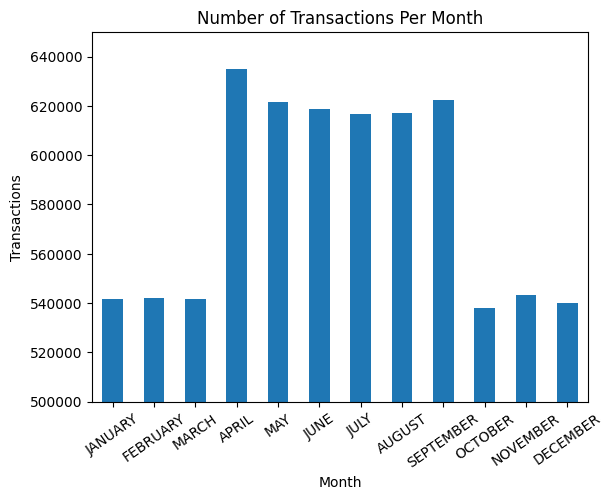

In [10]:
food=book.groupby("month").count().reset_index().reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])
food.plot.bar(x="month", y="transaction_id", legend=False).set(xlabel="Month", ylabel="Transactions"), plt.title("Number of Transactions Per Month"), plt.xticks(rotation=35)
plt.ylim(500000, 650000)
plt.show()

In [20]:
food1 = food.sort_values(by="transaction_id").tail(6)
food2 = food.sort_values(by="transaction_id").head(6)

In [22]:
food1["transaction_id"].mean()

621945.0

In [23]:
food2["transaction_id"].mean()

541159.5